## Import Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import LabelBinarizer


## Preprocessing Data

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_generator=train_datagen.flow_from_directory('Datanew/val/', target_size=(128,128), color_mode='rgb', batch_size=30, shuffle=True, subset='training')
validation_generator=train_datagen.flow_from_directory('Datanew/val/', target_size=(128,128), batch_size=64, shuffle=False, subset='validation')

Found 1620 images belonging to 3 classes.
Found 177 images belonging to 3 classes.


## Design The Model

In [3]:
model=Sequential()

# layer konvolusi 1 + layer input
model.add(Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# layer konvolusi 2
model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# layer konvolusi 3
model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
#layer konvolusi 4
model.add(Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))
model.add(Dropout(0.2))

# Flatten layer
model.add(Flatten())

# Hidden layer 1
model.add(Dense(152, activation='relu'))
model.add(Dropout(0.2))
# Hidden layer 2
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))


c:\Users\LENOVO\Desktop\Portfolio_AI\P4_MutliclassClassification_WearingMask_DeepLearningfromScratch\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 152)            │       953,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 152)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       156,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,354,075 (5.17 MB)

 Trainable params: 1,354,075 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

## Training The Model

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97):
            self.model.stop_training=True

stopTraining=Callback()

In [7]:
history=model.fit(train_generator, validation_data=validation_generator, epochs=15, callbacks=[stopTraining])

c:\Users\LENOVO\Desktop\Portfolio_AI\P4_MutliclassClassification_WearingMask_DeepLearningfromScratch\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 645ms/step - accuracy: 0.4600 - loss: 1.0171 - val_accuracy: 0.7966 - val_loss: 0.4302
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 437ms/step - accuracy: 0.8341 - loss: 0.4347 - val_accuracy: 0.8701 - val_loss: 0.3600
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 469ms/step - accuracy: 0.8783 - loss: 0.3563 - val_accuracy: 0.8870 - val_loss: 0.3048
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 443ms/step - accuracy: 0.9164 - loss: 0.2311 - val_accuracy: 0.9266 - val_loss: 0.2549
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 524ms/step - accuracy: 0.9132 - loss: 0.2270 - val_accuracy: 0.9379 - val_loss: 0.2385
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 530ms/step - accuracy: 0.9448 - loss: 0.1530 - val_accuracy: 0.9096 - val_loss: 0.2352
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 523ms/step - accuracy: 0.9481 - loss: 0.1315 - val_accuracy: 0.9209 - val_loss: 0.1859
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 494ms/step - accuracy: 0.9466 - loss: 0.1490 - val_accu

## Model Prediction

In [10]:
predicts_vectors=model.predict(validation_generator, verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step


In [11]:
pred=np.argmax(predicts_vectors, axis=1)

In [12]:
lb=LabelBinarizer()
lb.fit(validation_generator.labels)

y_test=lb.transform(validation_generator.labels)
y_pred=lb.transform(pred)

In [13]:
y_true=validation_generator.labels
y_pred=pred

recall=recall_score(y_true, y_pred, average='macro')
precision=precision_score(y_true, y_pred, average='macro')
f1=f1_score(y_true, y_pred, average='macro')
acc=accuracy_score(validation_generator.labels, pred)

In [14]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [15]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2]


In [16]:
print('>>>> RESULT <<<<')
print('Accuracy: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Score: {}'.format(f1))

>>>> RESULT <<<<
Accuracy: 92.09039548022598
Recall: 92.09039548022598
Precision: 92.3911906256539
F1-Score: 0.9212921467747751


In [17]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.95      0.91        59
           2       0.98      0.90      0.94        59

    accuracy                           0.92       177
   macro avg       0.92      0.92      0.92       177
weighted avg       0.92      0.92      0.92       177



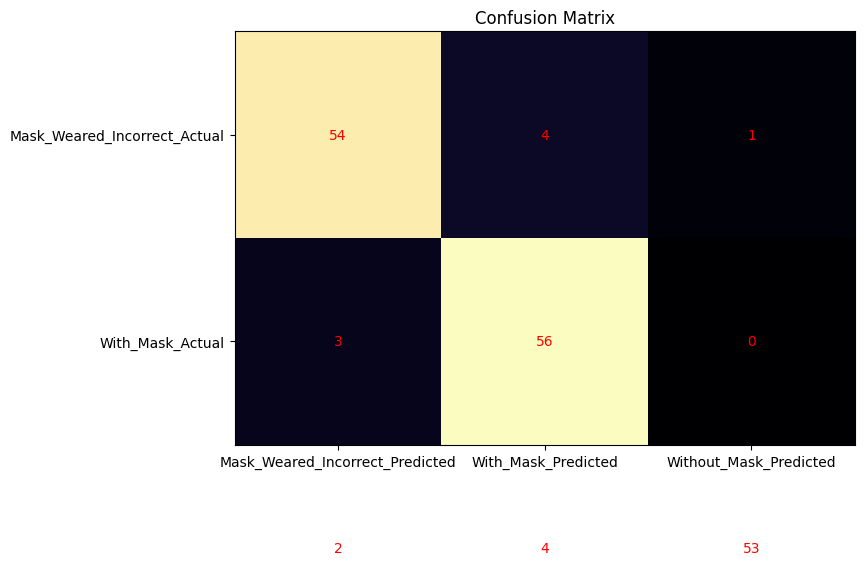

Accuracy: 0.9209
Sensitivity: 0.9153
Specificity: 0.9492


In [19]:
cm=confusion_matrix(y_test.argmax(axis=1), y_pred)
total=sum(sum(cm))
acc=(cm[0,0] + cm[1,1] + cm[2,2]) / total
sensitivity=cm[0,0] / (cm[0,0] + cm[0,1] + cm[0,2])
specificity=cm[1,1] / (cm[1,0] + cm[1,1] + cm[1,2])

# Plot Confusion Matrix
fig, ax=plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='magma')
ax.set_title("Confusion Matrix")
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Mask_Weared_Incorrect_Predicted', 'With_Mask_Predicted', 'Without_Mask_Predicted'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Mask_Weared_Incorrect_Actual', 'With_Mask_Actual', 'Without_Mask_Actual'))
ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Accuracy: {:.4f}".format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

Accuracy: 0.9209
Sensitivity: 0.9153
Specificity: 0.9492


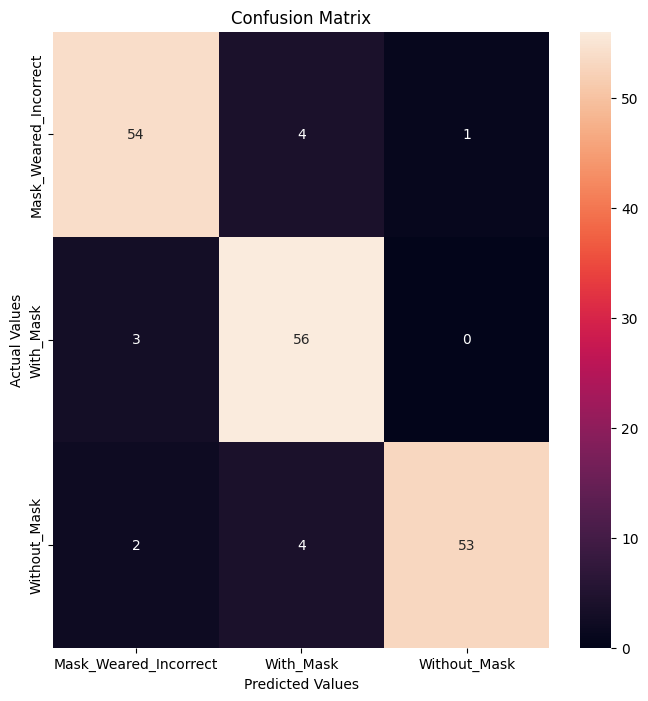

In [22]:
cm=confusion_matrix(y_test.argmax(axis=1), y_pred)
total=sum(sum(cm))
acc=(cm[0,0] + cm[1,1] + cm[2,2]) / total
sensitivity=cm[0,0] / (cm[0,0] + cm[0,1] + cm[0,2])
specificity=cm[1,1] / (cm[1,0] + cm[1,1] + cm[1,2])

cm_df=pd.DataFrame(cm, index=['Mask_Weared_Incorrect', 'With_Mask', 'Without_Mask'],
                   columns=['Mask_Weared_Incorrect', 'With_Mask', 'Without_Mask'])

# Plotting The Confusion Matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)

plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

print("Accuracy: {:.4f}".format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

plt.show()